**Srinivas Naidu Pasyavula <br>
QC61851**
<br><br>
Dr. Tony Diana <br>
DATA 690 Introduction to NLP <br>
Homework, Week 10<br><br>

In [1]:
# This code mounts your Google Drive to the Colab notebook, changes the directory to a specific folder on your Drive, and lists the contents of that folder using the ls command.

#!hostname -I
from google.colab import drive
drive.mount('/content/drive')
#
%cd /content/drive/MyDrive/'Colab Notebooks'/'NLP DATA 690 UMBC'/'week10'
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/NLP DATA 690 UMBC/week10
 imdb-reviews_2.csv  'QC61851-Srinivas Naidu Pasyavula-NLP-Week 10- HW.ipynb'


# **Exercise - 1**

## Import necessary libraries

In [2]:
#!pip install pandas matplotlib wordcloud scikit-learn seaborn nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag

In [7]:
# Load the data
df = pd.read_csv('imdb-reviews_2.csv')

In [8]:
# Count positive and negative sentiment
positive_count = df['label'].sum()
negative_count = len(df) - positive_count
print(f'Positive reviews: {positive_count}, Negative reviews: {negative_count}')

Positive reviews: 2528, Negative reviews: 2472


In [9]:
# Clean the text and create 'review_processed' column
df['review_processed'] = df['review'].str.lower()
df['review_processed'] = df['review_processed'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [10]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
df['review_processed'] = df['review_processed'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [11]:
# Custom list of words to be removed
custom_stop_words = ['movie', 'film', 'one', 'make', 'even','br','s']
df['review_processed'] = df['review_processed'].apply(lambda x: ' '.join([word for word in x.split() if word not in custom_stop_words]))

In [12]:
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import re

# Create the lemmatizer
lemmatizer = WordNetLemmatizer()

# Your lemmatize_text function
def lemmatize_text(text):

    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    tokens = word_tokenize(text)
    wordnet_tagged = pos_tag(tokens)

    # Map NLTK tags to WordNet tags
    tag_map = {
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV,
        'A': wordnet.ADJ
    }

    lemmatized = []
    for token, tag in wordnet_tagged:
        tag = tag[0].upper()  # Take the first character of the NLTK tag
        tag = tag_map.get(tag, wordnet.NOUN)  # Use NOUN as default
        lemmatized.append(lemmatizer.lemmatize(token, tag))

    return ' '.join(lemmatized)

# Apply lemmatization to the 'review_processed' column
df['review_processed'] = df['review_processed'].apply(lemmatize_text)


In [13]:
# Plot the most frequent words from positive reviews
positive_reviews = df[df['label'] == 1]['review_processed']
positive_words = ' '.join(positive_reviews)
positive_word_freq = pd.Series(positive_words.split()).value_counts().head(30)

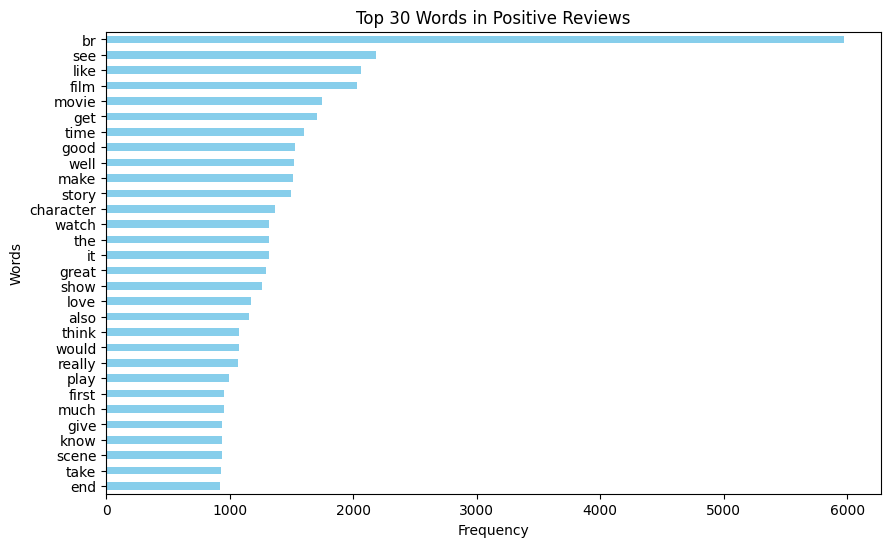

In [14]:
# Plot bar chart
plt.figure(figsize=(10, 6))
positive_word_freq.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 30 Words in Positive Reviews')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

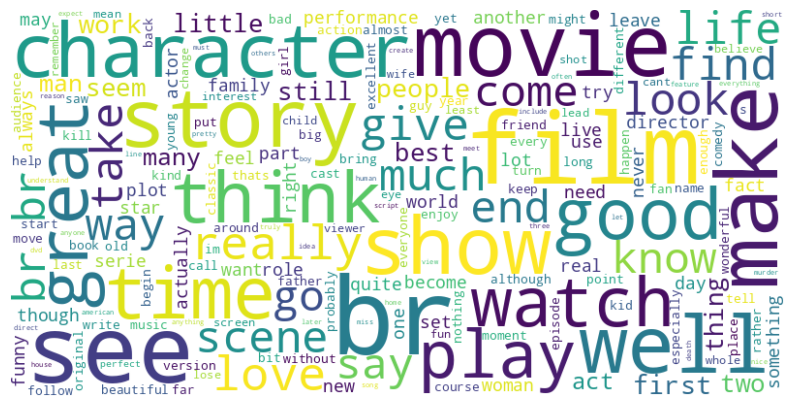

In [15]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [16]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['review_processed'], df['label'], test_size=0.2, random_state=42)

In [17]:
# Use GaussianNB to train the model
vectorizer = CountVectorizer(max_features=2500)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

nb_model = GaussianNB()
nb_model.fit(X_train_vec.toarray(), y_train)

GaussianNB()

In [18]:
# Accuracy on the training set
train_accuracy = accuracy_score(y_train, nb_model.predict(X_train_vec.toarray()))
print(f'Training Accuracy: {train_accuracy:.2f}')

Training Accuracy: 0.79


In [19]:
# Test the model on the test set
y_pred = nb_model.predict(X_test_vec.toarray())
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy:.2f}')

Test Accuracy: 0.71


In [20]:
# Create confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print('Confusion Matrix:')
display(conf_matrix)
print('\nClassification Report:')
display(class_report)

Confusion Matrix:


array([[400,  79],
       [211, 310]])


Classification Report:


'              precision    recall  f1-score   support\n\n           0       0.65      0.84      0.73       479\n           1       0.80      0.60      0.68       521\n\n    accuracy                           0.71      1000\n   macro avg       0.73      0.72      0.71      1000\nweighted avg       0.73      0.71      0.71      1000\n'

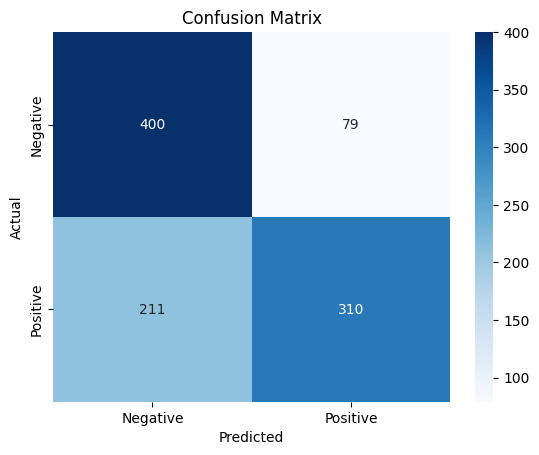

In [21]:
# Use Seaborn heatmap to show TP, FP, TN, FN values
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# Use logistic regression model and check the accuracy for different values of C
C_values = [0.01, 0.05, 0.5, 1]
for C in C_values:
    lr_model = LogisticRegression(C=C, random_state=42)
    lr_model.fit(X_train_vec, y_train)
    accuracy = lr_model.score(X_test_vec, y_test)
    print(f'Accuracy for C={C}: {accuracy:.2f}')

Accuracy for C=0.01: 0.85
Accuracy for C=0.05: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for C=0.5: 0.83
Accuracy for C=1: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test_vec)[:, 1])
roc_auc = auc(fpr, tpr)

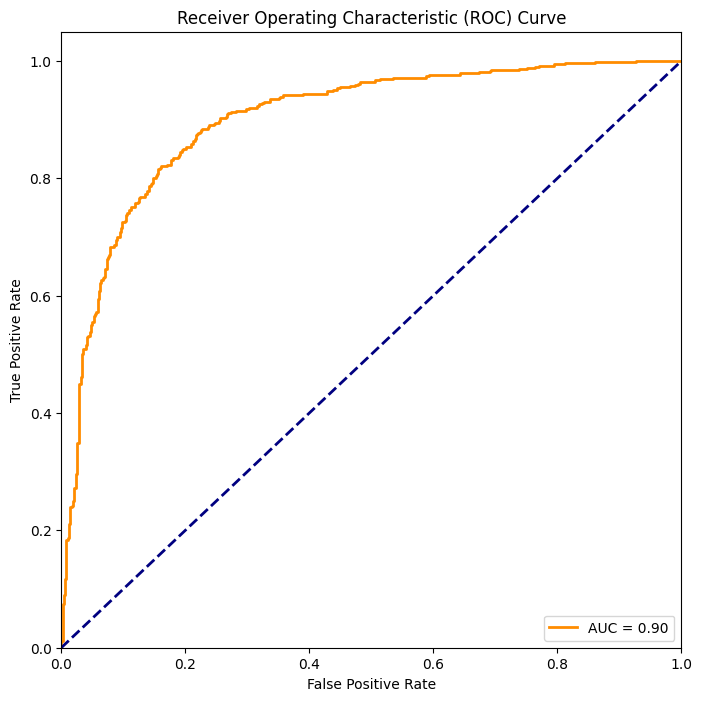

In [24]:
# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [25]:
# Area under the curve
print(f'Area under the curve (AUC): {roc_auc:.2f}')

Area under the curve (AUC): 0.90
